# COGS 118A- Final Project

# Poisonous Mushroom Classification

# Names

- Kody Chuang
- Nikki Rejai
- Jennifer Jiang
- Elise Davis


# Abstract 

 By using various supervised machine learning techniques we aim to distinguish which mushrooms in our dataset are poisonous and which are safe to eat. First we will split our data into a training set and test set. We will use decision trees, random forests, as well as ensembles. To determine which of these models is best suited for our data we will be using K-folds cross validation to determine the best hyper parameters for each model and then compare the performance between the models. We will use confusion matrices to check specificity of each model and ROC-AUC curves to compare the performance of the models and select the one whose ROC-AUC score is closest to 1 as the best model. Then we will apply our model on our test set, and use the ROC-AUC score of our performance on the test set to be our measure of success of how well we could distinguish which mushrooms are poisonous. 

# Background


There are several risks of eating poisonous mushrooms. Consuming poisonous mushrooms can cause gastrointestinal issues, liver or kidney failure, hallucinations, and even death. The symptoms can differ depending on the species of mushroom and the amount that is ingested<a name="tran"></a>[<sup>[1]</sup>](#trannote). Poisonous mushrooms are still unsafe to consume even after cooking or heating them, so many experts suggest avoiding eating unknown wild mushrooms altogether<a name="fact"></a>[<sup>[2]</sup>](#factnote).

It is difficult to tell if mushrooms are poisonous or not from a glance. Mushrooms do not have a clear indicator of whether or not they are poisonous, unlike plants like poison oak or poison ivy. Additionally, there is no at-home test to safely decide whether a mushroom is poisonous or edible<a name="dep"></a>[<sup>[3]</sup>](#depnote). As a result, many sources simply recommend people to only consume store bought mushrooms to avoid suffering from mushroom poisoning.

There have been several reports of people accidentally consuming poisonous mushrooms, some of which were more life-threatening than others. From 1999 to 2016, the U.S. The National Poison Data System recorded over 7000 cases of mushroom exposure<a name="brand"></a>[<sup>[4]</sup>](#brandnote). While most of these cases were reported to result in little to no harm, in 2016, it is estimated that there were over 1300 emergency visits and 100 hospitalizations associated with poisonous mushroom ingestion in the United States alone<a name="cent"></a>[<sup>[5]</sup>](#centnote). Many of these cases occur due to people falsely identifying poisonous mushrooms as edible and can be easily prevented.   

Mushrooms have a variety of attributes that can be used to identify what species they belong to. For instance, different species may have unique odors, cap shapes, colors, or ring types. By studying various mushroom attributes, we hope to possibly lower the chances of people misidentifying poisonous mushrooms by creating a machine learning solution that can classify mushrooms as either edible or poisonous. 

# Problem Statement

Given various mushroom attributes such as shape, color, odor, and habitat, we want to be able to classify different species of gilled mushrooms as either edible or poisonous by applying machine learning techniques such as decision trees, random forests, and ensembles.


# Data

Dataset: https://archive-beta.ics.uci.edu/dataset/73/mushroom

This dataset describes characteristics of mushrooms. It has 22 variables, 8124 observations. Since the data is categorical we will use a one hot encoding on our data to transform it to numerical data so we can apply machine learning algorithms on the data. The “poisonous” variable is the target and thus will be removed when we are training the data. The rest of the variables are categorical descriptive characteristics of the mushrooms which we will use to predict whether they are poisonous. Below we have listed the different vairables(attributes), their roles and types of data.

| Attribute Name | Role | Type |
| --- | --- | --- |
| poisonous | target | categorical |
| cap-shape | feature | categorical |
| cap-surface | feature | categorical |
| cap-color | feature | categorical |
| bruises | feature | categorical |
| odor | feature | categorical |
| gill-attachment | feature | categorical |
| gill-spacing | feature | categorical |
| gill-size | feature | categorical |
| gill-color | feature | categorical |
| stalk-shape | feature | categorical |
| stalk-root | feature | categorical |
| stalk-surface-above-ring | feature | categorical |
| stalk-surface-below-ring | feature | categorical |
| stalk-color-above-ring | feature | categorical |
| stalk-color-below-ring | feature | categorical |
| veil-type | feature | categorical |
| veil-color | feature | categorical |
| ring-number | feature | categorical |
| ring-type | feature | categorical |
| spore-print-color | feature | categorical |
| population | feature | categorical |
| habitat | feature | categorical |


# Proposed Solution

First, we will one hot encode our data. The data is categorical and we don’t want to introduce a bias or order to the data, therefore one-hot encoding is the best solution. First we will split our data into training and testing data with a 66 / 33 percent split respectively. Because our data is so multi-dimensional with 22 variables, it would be incredibly difficult to plot the data and visualize its pattern, ruling out certain models such as kernels which heavily rely on being able to visualize the data. 

Because our data is binary and the mushroom is either poisonous or not, the models we will be testing are decision trees, random forests, as well as ensembles. To determine which of these models is best suited for our data we will be using K-folds cross validation to determine the best hyper parameters for each model and then compare the performance between the models. From this, we will pick the best model. We want to ensure that our model is as accurate as possible, so we will be using the following evaluation metrics to test its performance.


# Evaluation Metrics

We will be using several different evaluation metrics to measure the percentage of correctly labeled mushrooms. Firstly we will use a confusion matrix and focus on the specificity, because incorrectly labeling a mushroom as edible can be incredibly dangerous. The specificity is calculated as the number of true negatives divided by the total number of negatives selected, we hope to get this number as close to zero as possible. We will also be using a ROC-AUC curve to visualize the comparison between models and select the one whose area is closest to 1. ROC-AUC is calculated by using the true positive rate as the x-axis and the false positive rate as the y-axis.

$$ Specificity = \frac{True Negatives}{True Negatives + False Positives} $$


# Results

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Subsection 1: Understanding and Cleaning Our Data

In [2]:
feature_names = ["cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
target_names = ["edible", "inedible"]

df = pd.read_csv("./expanded", header = 0, names = ["edible", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"])
df

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,CLUSTERED,LEAVES


#### Above we have imported our data set from UC Irvine Machine Learning Repository and have created a dataframe based on our values. The column names correspond to the attribute names and the rows indicate different types of mushrooms. The table has 8416 rows x 23 columns, but as you can see in row 8415, there are a decent number of rows with null values in it.

#### As you can see, there are some null rows at the bottom of our data, lets clear those.

In [3]:
df.dropna(how = 'any')
df["edible"].unique()
df['edible'].value_counts()

EDIBLE                                                                    4487
POISONOUS                                                                 3928
----------------------------------------------------------------------       1
Name: edible, dtype: int64

In [4]:
df = df.loc[~((df['edible'] != 'EDIBLE') & (df['edible'] != 'POISONOUS'))]
df['edible'].value_counts()

EDIBLE       4487
POISONOUS    3928
Name: edible, dtype: int64

#### We now have 8415 rows x 23 columns

#### Now, we want to make the target column a binary variable with each edible occurrence being replaced with a 1 and each poisonous occurrence being replaced with a 0

In [5]:
df = df.replace('EDIBLE', 1)
df = df.replace('POISONOUS', 0)
df["edible"].unique()

array([1, 0])

#### Before we encode the rest of our data, lets split into training and testing data to prevent data leakage

In [6]:
from sklearn.model_selection import train_test_split


y = pd.DataFrame(df["edible"])
X = df.loc[:, df.columns != "edible"]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33, random_state=42)

#### We put our classification column into the variable y and our feature columns into the variable X. We then used the sklearn train_test_split function to creat a 66 / 33 split of training data and testing data

### Subsection 2: One Hot Encoding
#### Because our data is categorical, in order to run ML models on it, we must first encode the data using One Hot Encoding
#### One Hot Encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. One Hot encoding also allows us to encode without introducing a bias to the data. It lists out all possible values for each attribute and puts either a 0 or 1 in that index. 0 indicates non existent while 1 indicates existent.

#### We will create a OneHotEncoder to encode the data in our X_train dataset. We then will convert it into a dataframe so we can work with it easier.

In [7]:
from sklearn.preprocessing import OneHotEncoder

# create an encoder and fit the dataframe
enc = OneHotEncoder(sparse_output=False).fit(X_train)
encoded = enc.transform(X_train)
# convert it to a dataframe
X_train = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)

X_train

,cap-shape_BELL,cap-shape_CONICAL,cap-shape_CONVEX,cap-shape_FLAT,cap-shape_KNOBBED,cap-shape_SUNKEN,cap-surface_FIBROUS,cap-surface_GROOVES,cap-surface_SCALY,cap-surface_SMOOTH,...,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5634,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5635,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5636,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Because each value for each attribute is its own column now, the number of columns have nearly quintupled going from 23 columns to 117

#### We must now do the same with the X_test set

In [8]:
# create an encoder and fit the dataframe
encoded = enc.transform(X_test)
# convert it to a dataframe
X_test = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)

X_test

,cap-shape_BELL,cap-shape_CONICAL,cap-shape_CONVEX,cap-shape_FLAT,cap-shape_KNOBBED,cap-shape_SUNKEN,cap-surface_FIBROUS,cap-surface_GROOVES,cap-surface_SCALY,cap-surface_SMOOTH,...,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2773,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2774,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2775,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Subsection 3: Decision Tree
#### We decided to start with a basic model to see how well it performed and to have something to compare the more complex models to. In this case, we have chosen a basic decision tree classifier. A decision tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions. The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.

#### We use this sort of decision making to go down each attribute and based on each yes or no decision, we split the feature space, and apply rules, until we don’t have any more rules to apply or no data points left. Then we assign a class of "edible" or "poisonous" to each leaf node to classify them

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for test dataset
yhat_train = clf.predict(X_train)
yhat_test = clf.predict(X_test)


#### Here we have created and trained a Decision Tree Classifier using our dataset. We then used the trained decision tree to predict responses for the test dataset

#### Then we compared the actual train and test sets with the predicted responses to get accuracy scores based on precision, recall, f1-scores, and accuracy.

In [34]:
from sklearn.metrics import accuracy_score, classification_report

acc_train = accuracy_score(y_train, yhat_train)
acc_test = accuracy_score(y_test, yhat_test)

print(f'training set accuracy (n={y_train.shape[0]}): {acc_train:4.3f}')
print(f'test set accuracy (n={y_test.shape[0]}): {acc_test:4.3f}')
print()
print('classificiation report on test set performance')
print(classification_report(y_test, yhat_test))
print()

training set accuracy (n=5638): 0.987
test set accuracy (n=2777): 0.984

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1280
           1       1.00      0.97      0.99      1497

    accuracy                           0.98      2777
   macro avg       0.98      0.99      0.98      2777
weighted avg       0.98      0.98      0.98      2777




##### We can see from the classification report matrix, that the deicion tree values for precision (0.97 / 1.00), recall (1.00/ 0.97), f1-score (0.98 / 0.99) and support (1280 / 1497) are all very close to 1.00 which is perfect classification. This is great, but lets look at the confusion matrix and ROC-AUC to confirm

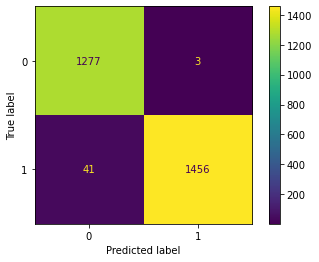

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, yhat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

#### Here we see the Type I errors (false positives) are quite low where only 3 out of the total dataset were classified as such, meanwhile the Type II errors (false negatives) are a bit higher at 41, but is still quite miniscule compared to the total number in our dataset.

#### This is especially good because we are mainly looking to minimize false positives as misclassifying a poisonous mushroom as edible could be catastrophic

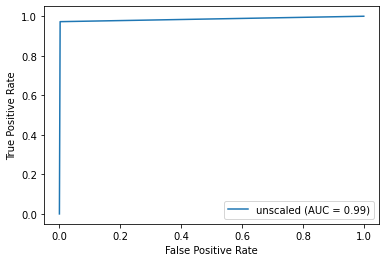

In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, yhat_test) 
roc_auc = auc(fpr, tpr)
DTdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='unscaled')
DTdisplay.plot()
plt.show()

#### The ROC-AUC score of 0.99 is close to perfect and as seen in the graph, it indicates that our decision tree is a very good classifier for our purposes.
#### As you can see from the decision tree classifier accuracy scores, confusion matrix, and ROC-AUC graph, even this basic model does a very good job, leading us to believe that we can get near 100% accuracy with a better fit model. 

### Subsection 4: More Complex Models

#### We will now try a Random Forest Classifier to see if we can get better results compared to the Decision Tree Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, np.ravel(y_train))
yhat_test = clf.predict(X_test)

#### We once again used the sklearn package to create and train a Random Forest Classifier. We then used this trained model to check the accuracy score matrix

In [29]:
acc_train = accuracy_score(y_train, yhat_train)
acc_test = accuracy_score(y_test, yhat_test)

print(f'training set accuracy (n={y_train.shape[0]}): {acc_train:4.3f}')
print(f'test set accuracy (n={y_test.shape[0]}): {acc_test:4.3f}')
print()
print('classificiation report on test set performance')
print(classification_report(y_test, yhat_test))
print()

training set accuracy (n=5638): 0.987
test set accuracy (n=2777): 0.942

classificiation report on test set performance
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1280
           1       0.90      1.00      0.95      1497

    accuracy                           0.94      2777
   macro avg       0.95      0.94      0.94      2777
weighted avg       0.95      0.94      0.94      2777




#### As you can see, the Random Forest Classifier accuracy scores are much lower compared to the decision tree classifier scores. This would mean that the Random Forest Classifier is a worse fit for our dataset compared to the Decision Tree. Lets look at the confusion matrix and ROC-AUC graph to confirm

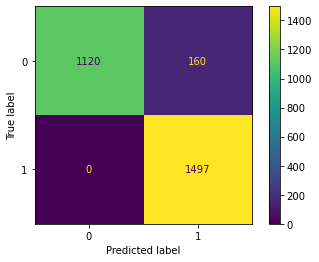

In [30]:
cm = confusion_matrix(y_test, yhat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

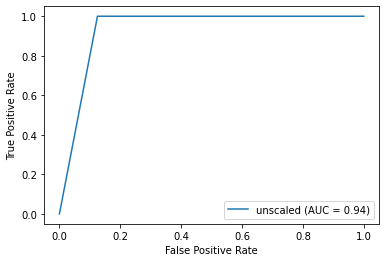

In [31]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, yhat_test) 
roc_auc = auc(fpr, tpr)
RFdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='unscaled')
RFdisplay.plot()
plt.show()

#### Although the confusion matrix had 0 Type II errors (false negatives), we want to minimize the Type I errors (false positives) which was much higher than the Decision Tree's false positive rate. 

#### Additionally, the ROC-AUC score is lower at 0.94 compared to the Decision Tree's score of 0.99. It looks like the random forest is doing a worse job than the decision tree. With the Decision Tree as our best model right now, lets try a different approach

### Subsection 5: Utilizing Cross Validation

#### We will now try the AdaBoost Classifier, which stands for Adaptive Boosting, is an algorithm that builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points with higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received.

#### We will also use K-fold cross validation to tune the hyperparameters for the most accurate output in our model

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
ada = AdaBoostClassifier()
crossvalidation = KFold(n_splits = 10,shuffle = True,random_state = 1)

search_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search = GridSearchCV(estimator = ada,param_grid = search_grid, scoring = 'accuracy', n_jobs = 1, cv = crossvalidation)

search.fit(X_train,np.ravel(y_train))
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

#### We used a K-fold cross validation with 10 splits and random shuffle. We then used GridSearch with estimators: [500,1000,2000] and learning_rates [.001,0.01,.1] to look for the best hyperparameter based on accuracy.

#### We then find that the best_score_ gives us 0.999645390070922 which is super close to 1.00 meaning these hyperparameters are nearly perfect.

In [16]:
search.best_score_

0.999645390070922

#### We then apply these hyperparameters to our AdaBoostClassifier and construct a confusion matrix and ROC-AUC graph to interpret the results and compare with the Decision Tree Classifier scores

In [17]:
ada = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.1)
ada.fit(X_train, np.ravel(y_train))
yhat_test = ada.predict(X_test)

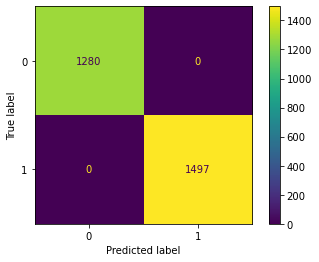

In [18]:
cm = confusion_matrix(y_test, yhat_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

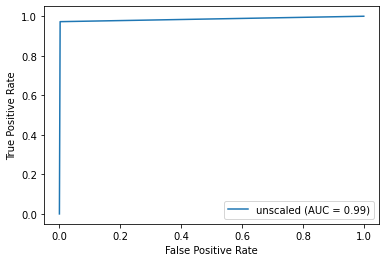

In [41]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, yhat_test) 
roc_auc = auc(fpr, tpr)
ADAdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='unscaled')
ADAdisplay.plot()
plt.show()

#### The AdaBoost Classifier produced nearly perfect results in that it gave 0 Type I and Type II errors, in addition to its 0.99 ROC-AUC score. The ROC-AUC score is the same as the Decision Tree Classifier ROC-AUC score, but unlike the Decision Tree, the AdaBoost Classifier gave 0 misclassifications.

#### Based on both the results of the confusion matrix as well as the ROC-AUC curve, we can clearly see that the ADAboost model is superior to both the decision tree and the Random Forest and is the best model to use when classifying whether a mushroom is poisonous or not based on its physical attributes

# Discussion

### Interpreting the result

Among the three algorithms we used: Decision Trees, Random Forests, and Adaptive Boost, we found that the Adaptive Boost (Adaboost) classification algorithm performed the best in determining which mushrooms in the dataset were poisonous or edible. 


- The Adaboost algorithm assigns higher weights to datapoints which are miss classified each iteration and retrains the model to correct the mistakes of the previous iteration, thus optimizing the hyperparameters and yielding the best result. We implemented the Adaboost classification algorithm by using k-fold cross validation with 10 n_splits and random shuffle, in search of the best hyperparameters based on accuracy. This process found the best performing hyperparameters were `learning_rate=0.1`and `n_estimators=500`, which had an accuracy of over 99.9%.


- The Decision Trees we trained also had an ROC-AUC score of 0.99, which is comparable to the Adaboost classifier’s score of 0.99, however the Decision Tree also had many false negatives, and some false positives, which could be very dangerous in the context of this data as it is labeling a mushroom as edible when it is in fact poisonous. The Adaboost classifier however had no misclassification, thus it is more robust model with higher accuracy.


- Although the Adaboost classifier performed the best of the three, another finding from our analysis is that the decision tree performed better than random forest, as they had ROC-AUC scores of 0.99 and 0.94, respectively. This is interesting as the random forest are created using several decision trees to construct a stronger model. However, in the case of our Random Forest, although it had no false negatives, it had 160 false positives which made the ROC-AUC lower than the decision tree, which had 41 false negatives, and 3 false positives. And again in the context of classifying mushrooms, the consequence of having false positives in our model is much worse than false negatives. But misclassification of any kind is not favorable, which is why we selected he Adaboost Classification model with no misclassification as the best model for our dataset.


### Limitations

- Exploring other models: We originally were planning on exploring other models other than the ones we ended up using in our project, for instance, neural nets. However, the last model we used produced near 100% accuracy and was not too computationally expensive, so it ended up not being necessary. 


- Adding data: The dataset we used exclusively contained observations of gilled mushrooms and some of the variables in the dataset were related to gill characteristics. If we were to add data on non-gilled mushrooms (types of fungus that are not agaric), the model that worked best on our dataset would likely not work as well with the new data.


- Runtime issue: Running K-fold cross validation and grid search took some time to run, about 20 minutes. However, we only needed to run it once, so it was not a huge issue.


### Ethics & Privacy

One of the ethical issues we have has to deal with bias and discrimination. If our machine learning program is trained on biased or unrepresentative data, it may lead to discriminatory outcomes. For example, if the training data primarily consists of mushrooms from certain geographic regions, the program may misclassify mushrooms from underrepresented regions, potentially leading to false determinations of toxicity. To combat this, we must do extra research into our dataset ensuring diverse and representative training datasets to mitigate bias.

Another issue we must address deals with transparency and explainability. Because machine learning models can be so complex, ethical concerns arise regarding the transparency and explainability of the model's decision-making process. We must inform users about the limitations and uncertainties associated with the model's outputs to ensure responsible usage. Additionally, reliability and safety is a huge concern. The reliability and safety of our machine learning program are crucial ethical considerations. If the program produces inaccurate or unreliable results, it can have serious consequences, such as misclassifying toxic mushrooms as safe or vice versa. Robust testing, validation, and continuous monitoring are necessary to ensure the program's reliability and minimize potential harm. 

We must also address the ethical responsibility that extends to the appropriate use and dissemination of the machine learning program’s findings. Ensuring that our program is used for its intended purpose, such as assisting experts in making informed decisions rather than replacing human expertise entirely, is important. Additionally, clear communication of the program’s limitations and potential risks should be provided to users; informing users that we are not experts and using our algorithm may not give 100% accurate results. Furthermore, the last ethical considerations we want to address deals with the broader social and environmental impacts of our machine learning program. For instance, if the program’s predictions influence foraging practices or commercial mushroom harvesting, it could have implications for local ecosystems, sustainability, and the livelihoods of communities dependent on mushroom-related activities. Responsible usage and consideration of these broader impacts are crucial.


### Conclusion

The main goal of our project is to be able to detect if mushrooms were poisonous or not given various characteristics of different mushrooms. We first split our dataset into a train and test set before one-hot encoding our data. We then trained a decision tree classifier and random forest classifier and used measurements such as precision, recall, F1 score, and ROC-AUC score to determine which model produced better results for our dataset. We also used an AdaBoost classifier and utilized K-fold cross validation to tune the hyperparameters for the most accurate output in our model. The ROC-AUC score for the decision tree, random forest, and AdaBoost classifiers were 0.99, 0.94, and 0.99 respectively. However, the AdaBoost model had 0 classification errors, while the decision tree model resulted in some false positives and false negatives, as seen in the confusion matrix. Minimizing false negatives is extremely important in the context of our problem because incorrectly labeling a mushroom as edible is especially dangerous and can put people's lives at risk. 

Based on both the results of the confusion matrix as well as the ROC-AUC curve, we found that the AdaBoost classifier was most effective in identifying mushrooms as either edible or poisonous just by using different mushroom characteristics such as gill size, cap color, habitat, and odor. Through our project, we hope to prevent the misclassification of poisonous mushrooms, as mushroom poisoning affects thousands of people each year and can have fatal consequences. A potential challenge for the future is to extend this project to use image recognition to classify the edibility of mushrooms, rather than depending on a list of mushroom attributes. Image recognition may be more efficient and useful for people who are unable to identify all the mushroom attributes that were used in our dataset.


# Footnotes

<a name="trannote"></a>1.[^](#tran)Tran, H. H., &amp; Juergens, A. L. (2023, February 5). Mushroom Toxicity. National Library of Medicine. https://www.ncbi.nlm.nih.gov/books/NBK537111/#:~:text=Mushroom%20poisonings%20may%20range%20from,%2C%20toxins%2C%20and%20amount%20ingested. 

<a name="factnote"></a>2.[^](#fact) Fact sheets - wild mushroom poisoning. Wild mushroom poisoning - Fact sheets. (2023, May 10). https://www.health.nsw.gov.au/environment/factsheets/Pages/wild-mushroom-poisoning.aspx 

<a name="depnote"></a>3.[^](#dep)Department of Health & Human Services. (2001, October 31). Mushroom poisoning. Better Health Channel. https://www.betterhealth.vic.gov.au/health/healthyliving/fungi-poisoning 

<a name="brandnote"></a>4.[^](#brand) Brandenburg, W. E., & Ward, K. J. (2018, July 31). Mushroom poisoning epidemiology in the United States. Taylor and Francis Online . https://www.tandfonline.com/doi/full/10.1080/00275514.2018.1479561 

<a name="centnote"></a>5.[^](#cent) Centers for Disease Control and Prevention. (2021a, March 11). Health care utilization and outcomes associated with accidental poisonous mushroom ingestions - United States, 2016–2018. Centers for Disease Control and Prevention. https://www.cdc.gov/mmwr/volumes/70/wr/mm7010a1.htm 

